In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/shakthimaha/Downloads/Dataset/LBSM_All_London.csv')

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_2349/2164135893.py:1: DtypeWarning: Columns (22,23,26,28,32,34,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/shakthimaha/Downloads/Dataset/LBSM_All_London.csv')


In [5]:
df.columns

Index(['UPRN', 'SCU_ID', 'OS_TOPO_TOID', 'EASTING', 'NORTHING', 'LATITUDE',
       'LONGITUDE', 'OA', 'LSOA', 'MSOA', 'OAC', 'WARD_CODE', 'WARD',
       'ADMINISTRATIVE_AREA', 'ESTIMATED_FLOOR_COUNT',
       'ESTIMATE_TOTAL_FLOOR_AREA_ALL', 'SCU_FOOTPRINT',
       'MEAN_OBJECT_HEIGHT_M', 'BASEMENT_FLOOR', 'COUNT_D_UPRNS',
       'COUNT_ND_UPRNS', 'MIX_CLASS', 'DOMINANT_ND_ACTIVITY_BY_C2_FS',
       'DOMINANT_ND_ACTIVITY_BY_C2_COUNT', 'DEC_COUNT',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA',
       'EPC_RATING_COUNT_DOM', 'EPC_RATING_COUNT_NONDOM',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
       'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_B

In [6]:
columns = ['UPRN', 'SCU_ID', 'OS_TOPO_TOID', 'EASTING', 'NORTHING', 
           'LATITUDE', 'LONGITUDE', 'OA', 'LSOA', 'MSOA', 'OAC', 
           'WARD_CODE', 'WARD', 'ADMINISTRATIVE_AREA']

column_stats = []

total_rows = len(df)

for column in columns:
    unique_count = df[column].nunique() 
    null_count = total_rows - df[column].count()  
    null_percentage = (null_count / total_rows) * 100 
    column_stats.append([column, unique_count, null_percentage])

column_stats_df = pd.DataFrame(column_stats, columns=['Column', 'Unique Count', 'Null Percentage'])

print(column_stats_df)

                 Column  Unique Count  Null Percentage
0                  UPRN       4710943         0.000000
1                SCU_ID       2015843        10.859991
2          OS_TOPO_TOID       2255359         0.000000
3               EASTING        487647         0.000000
4              NORTHING        465229         0.000000
5              LATITUDE       1658787         0.000000
6             LONGITUDE       2009465         0.000000
7                    OA         25133         0.096753
8                  LSOA          4917         0.096753
9                  MSOA          1039         0.096753
10                  OAC            68         0.096753
11            WARD_CODE           762         0.096753
12                 WARD           750         0.096753
13  ADMINISTRATIVE_AREA            33         0.000000


In [8]:

columns = [
    'DEC_COUNT', 'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT',
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT',
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA',
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA',
    'EPC_RATING_COUNT_DOM', 'EPC_RATING_COUNT_NONDOM',
    'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
    'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT',
    'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
    'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT',
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT',
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA',
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA',
    'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT',
    'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA'
]

df_filtered = df[columns]

null_percentage = df_filtered.isnull().mean() * 100

print(null_percentage)

DEC_COUNT                                                0.000000
AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT             99.624109
AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT        99.624109
AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA         99.624109
AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA    99.624109
EPC_RATING_COUNT_DOM                                     0.000000
EPC_RATING_COUNT_NONDOM                                  0.000000
AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT              46.276404
AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT                  46.276404
AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA          46.555435
AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA              46.555435
AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT            48.029959
AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT                48.029959
AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA        48.313406
AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA            48.313406
AGG_RVEPC_

# Display Energy Efficiency  
## The count of DECs in the SCU

In [9]:
data_type_dec = df['DEC_COUNT'].dtype

unique_values_dec = df['DEC_COUNT'].nunique()

print("Data Type of DEC_COUNT:", data_type_dec)
print("Unique Values Count of DEC_COUNT:", unique_values_dec)

Data Type of DEC_COUNT: int64
Unique Values Count of DEC_COUNT: 14


# The count of domestic EPCs in the SCU 

In [10]:
data_type_dom = df['EPC_RATING_COUNT_DOM'].dtype

unique_values_dom = df['EPC_RATING_COUNT_DOM'].nunique()

print("Data Type of EPC_RATING_COUNT_DOM:", data_type_dom)
print("Unique Values Count of EPC_RATING_COUNT_DOM:", unique_values_dom)

Data Type of EPC_RATING_COUNT_DOM: int64
Unique Values Count of EPC_RATING_COUNT_DOM: 179


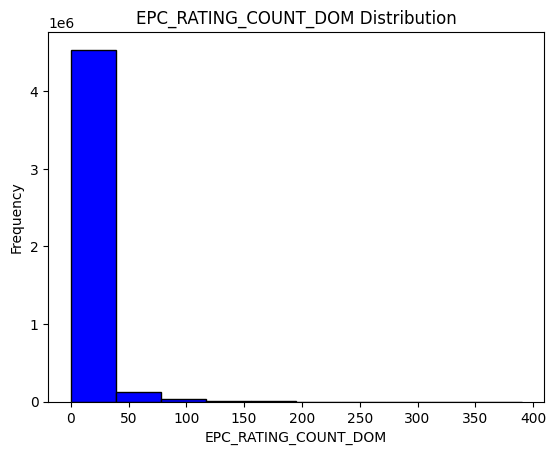

In [16]:

import matplotlib.pyplot as plt


plt.hist(df['EPC_RATING_COUNT_DOM'], bins=10, color='blue', edgecolor='black')

plt.title('EPC_RATING_COUNT_DOM Distribution')
plt.xlabel('EPC_RATING_COUNT_DOM')
plt.ylabel('Frequency')

plt.show()

# The count of non-domestic EPCs in the SCU

In [11]:
data_type_nondom = df['EPC_RATING_COUNT_NONDOM'].dtype

unique_values_nondom = df['EPC_RATING_COUNT_NONDOM'].nunique()

print("Data Type of EPC_RATING_COUNT_NONDOM:", data_type_nondom)
print("Unique Values Count of EPC_RATING_COUNT_NONDOM:", unique_values_nondom)

Data Type of EPC_RATING_COUNT_NONDOM: int64
Unique Values Count of EPC_RATING_COUNT_NONDOM: 34


In [20]:

data_type_efficiency = df['AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'].dtype
df1 = df.dropna(subset=['AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'])


unique_values_efficiency = df1['AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'].nunique()


print("Data Type of AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT:", data_type_efficiency)
print("Unique Values Count of AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT:", unique_values_efficiency)

Data Type of AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT: float64
Unique Values Count of AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT: 322


In [13]:

data_type_rating = df['AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT'].dtype


unique_values_rating = df['AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT'].nunique()


print("Data Type of AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT:", data_type_rating)
print("Unique Values Count of AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT:", unique_values_rating)

Data Type of AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT: object
Unique Values Count of AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT: 7


In [14]:
correlation = df[['AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT', 'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT']].corr()
print(correlation)

                                              AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT  \
AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT                                      1.000000   
AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT                                      0.601266   

                                              AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT  
AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT                                      0.601266  
AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT                                      1.000000  


In [17]:
unique_values = df['AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT'].nunique()
print("Unique Values Count:", unique_values)

unique_values_list = df['AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT'].unique()
print("Unique Values:", unique_values_list)

Unique Values Count: 207
Unique Values: [  nan   71.   68.   66.   72.   74.   73.   75.   62.   67.   60.   81.
   78.   77.   80.   50.   84.   61.   59.   83.   82.   20.   85.   14.
   63.   64.   57.   70.   65.   41.   44.   54.   38.   55.   45.   11.
   58.   87.   76.   29.   79.   32.   46.   51.   95.   49.   31.    5.
   52.   -4.   40.   33.   21.   69.  -66.   56.   48.   43.   34.   -1.
   -9.   91.   88.   42.   22.  -10.   36.  -74.   27.   17.   18.   53.
   86.   30.   37.   35. -209. -112.  -19.   23.   47.   15.   26.    1.
   10.   89.   90.   92.   93.  100.   94.    9.  118.   96.   28.  -33.
   97.   99.    4.   24.   25.   12.   98.   19.   13.    6.   39.   16.
    0.    2.  101.    8.  107.    3.    7.  108.  103.  -21.   -8.  102.
  105.  109.  104.  -23.  -24.  113.  -87.  112.  126.   -3.  -14.  110.
 -161.  -30.  -92.   -7. -132.  -11.  -18.   -5.  -49.  -29.  -20.  -42.
  -35.  -78.  -13.  -17. -215.  106.  151.  -56.  -15.  114.  -41.  -60.
  133.  -54

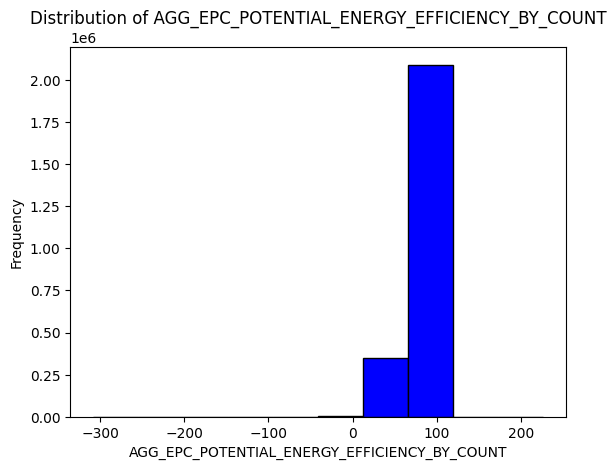

In [18]:
import matplotlib.pyplot as plt

plt.hist(df['AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT'].dropna(), bins=10, color='blue', edgecolor='black')
plt.title('Distribution of AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT')
plt.xlabel('AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT')
plt.ylabel('Frequency')
plt.show()

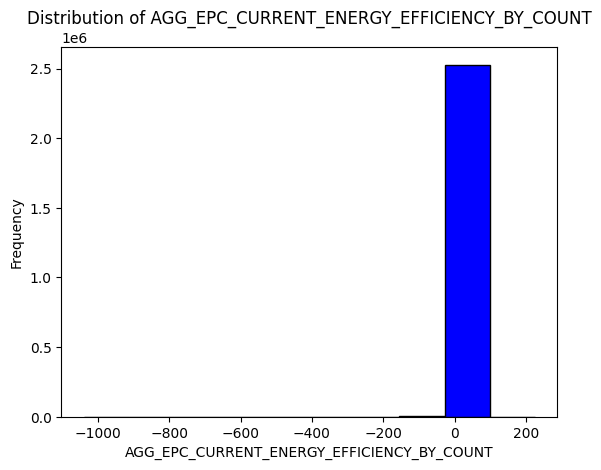

In [21]:
import matplotlib.pyplot as plt

plt.hist(df1['AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'].dropna(), bins=10, color='blue', edgecolor='black')
plt.title('Distribution of AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT')
plt.xlabel('AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT')
plt.ylabel('Frequency')
plt.show()